# Classification of MNIST data using Tensorflow/Keras
## Muhammed Ömer Faruk Selvi

# Gerekli kütüphaneler ve veri seti hazırlığı

In [1]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as L
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras import backend as K

import numpy as np

import skimage


def show(img):
    plt.imshow(img, cmap='gray')
    plt.show()


    

mnist = tf.keras.datasets.mnist

(x_train_, y_train_), (x_test, y_test) = mnist.load_data()

# train ve test setleri birleştirilip istenen oranda geri bölünebilir
# print(x_train_.shape)
# print(x_test.shape)
# x_train_ = np.concatenate((x_train_, x_test), axis=0)
# y_train_ = np.concatenate((y_train_, y_test), axis=0)

# iki diziyi de aynı düzende karıştır
np.random.seed(999); np.random.shuffle(x_train_)
np.random.seed(999); np.random.shuffle(y_train_)

# "Eğitim verisinin, sadece 5000 örneğini eğitim ve kalan kısmını validasyon için kullanınız."
# Train kısmının 5000 adede denk gelen kısmını train için kullan. Kalan kısmı validation setine at.
validation_split = 1.0 - (5000.0 / x_train_.shape[0])
print("Validasyon çarpanı:",validation_split)

split_idx = int(x_train_.shape[0]*(1.0-validation_split))
x_train = x_train_[:split_idx]
y_train = y_train_[:split_idx]

x_test = x_train_[split_idx:]
y_test = y_train_[split_idx:]

print(x_train.shape[0],"eğitim verisi,",x_test.shape[0],"doğrulama verisi bulunmaktadır.")
img_size = x_train.shape[1]
print("Görüntü boyutu",img_size,"x",img_size)


x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# one-hot kodlaması yap
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)
# burası örn. 3 değerini [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] vektörüne dönüştürür





Using TensorFlow backend.


Validasyon çarpanı: 0.9166666666666666
5000 eğitim verisi, 55000 doğrulama verisi bulunmaktadır.
Görüntü boyutu 28 x 28


## Rastgele bir dataya bakalım

695


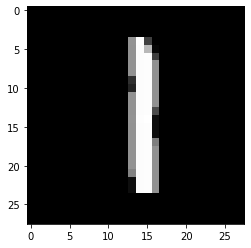

tf.Tensor([0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)
(28, 28, 1)


In [2]:
idx=int(np.random.rand(1)*len(x_train))
print(idx)
show(x_train[idx])
print(y_train[idx])
# print(x_train[idx])
print(x_train[idx].shape)
# print(x_train[idx])

# Gerekli fonksiyonlar
## Model oluşturma, model doğrulama, eğitim geçmişi grafiği çizdirme

In [32]:
def egitim(ogrenme_orani=0.001, momentum_orani=0.9, model_ismi="model_0"):
    
    layer_input = L.Input(shape=(img_size, img_size, 1), name='INPUT')

    lyr = L.Conv2D(64, (5,5), padding='same')(layer_input)
    lyr = L.ReLU()(lyr)
    lyr = L.AveragePooling2D((2,2))(lyr)

    lyr = L.Conv2D(128, (5,5), padding='same')(lyr)

    lyr = L.Flatten()(lyr)
    lyr = L.Dense(1280, activation='relu')(lyr)
    lyr = L.Dense(640, activation='relu')(lyr)
    lyr = L.Dense(10)(lyr)



    opt = tf.keras.optimizers.SGD(learning_rate=ogrenme_orani, momentum=momentum_orani)

    model = Model(layer_input, lyr)
    model._name = model_ismi
    model.compile(optimizer=opt, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    model.summary()


    batch_size = 256
    epoch_num = 20
    
    print("Eğitilmemiş haliyle modelin skorları:")
    dogrulama(model)

    train_history = model.fit(x_train, y_train, validation_data = (x_test, y_test),batch_size=batch_size,epochs=epoch_num, verbose=1)
    return model, train_history

def dogrulama(model):
    test_scores = model.evaluate(x_test,y_test,verbose=2)
    print("Loss:",test_scores[0])
    print("Tutarlılık:",test_scores[1])

def grafik(gecmis):
    for metric_name in gecmis.history.keys():
        if metric_name[:4] != "val_":
            plt.figure(figsize=(8, 6), dpi=100)
            plt.xlabel('Eğitim Döngüsü')
            plt.ylabel(metric_name)
            plt.plot(gecmis.history[metric_name])
            plt.plot(gecmis.history["val_"+metric_name])
            plt.legend(["Eğitim", "Test"])
            plt.show()
            plt.close()

print("Gerekli fonksiyonlar tanımlandı.")

Gerekli fonksiyonlar tanımlandı.


# Model1 (LR=0.1)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 64)        1664      
_________________________________________________________________
re_lu_8 (ReLU)               (None, 28, 28, 64)        0         
_________________________________________________________________
average_pooling2d_8 (Average (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 128)       204928    
_________________________________________________________________
flatten_8 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 1280)              3211

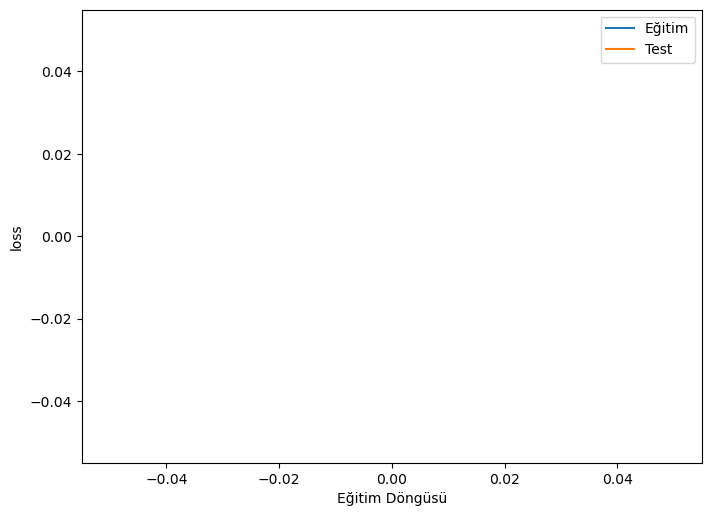

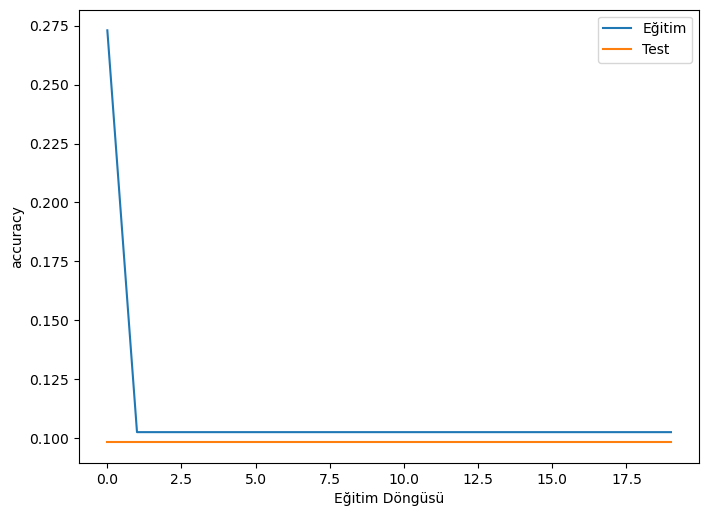

In [33]:
model1, gecmis1 = egitim(0.1, 0.9, "model_1")
dogrulama(model1)
grafik(gecmis1)

# Model2 (LR=0.01)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 64)        1664      
_________________________________________________________________
re_lu_9 (ReLU)               (None, 28, 28, 64)        0         
_________________________________________________________________
average_pooling2d_9 (Average (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 128)       204928    
_________________________________________________________________
flatten_9 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_27 (Dense)             (None, 1280)              3211

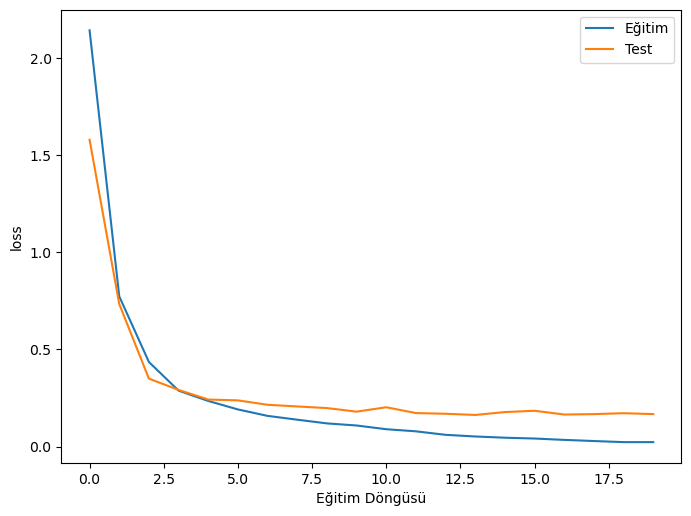

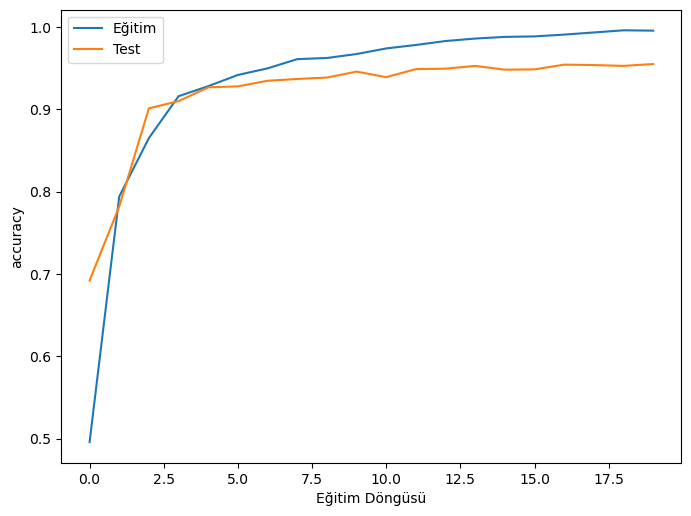

In [34]:
model2, gecmis2 = egitim(0.01, 0.9, "model_2")
dogrulama(model2)
grafik(gecmis2)

# Model3 (LR=0.001)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 64)        1664      
_________________________________________________________________
re_lu_10 (ReLU)              (None, 28, 28, 64)        0         
_________________________________________________________________
average_pooling2d_10 (Averag (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 128)       204928    
_________________________________________________________________
flatten_10 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_30 (Dense)             (None, 1280)              3211

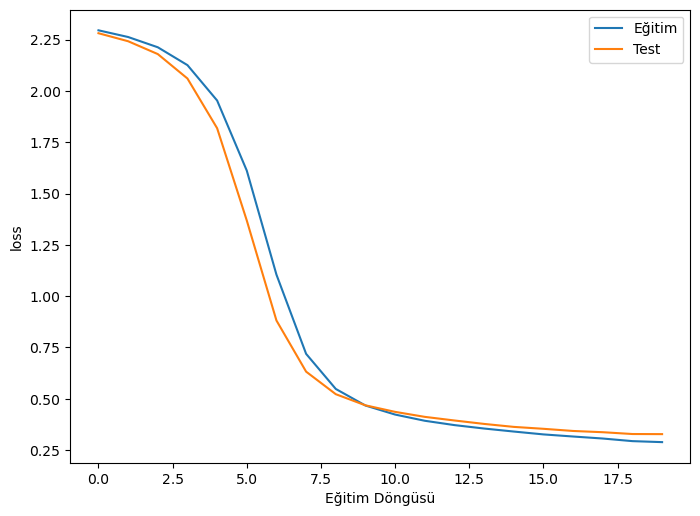

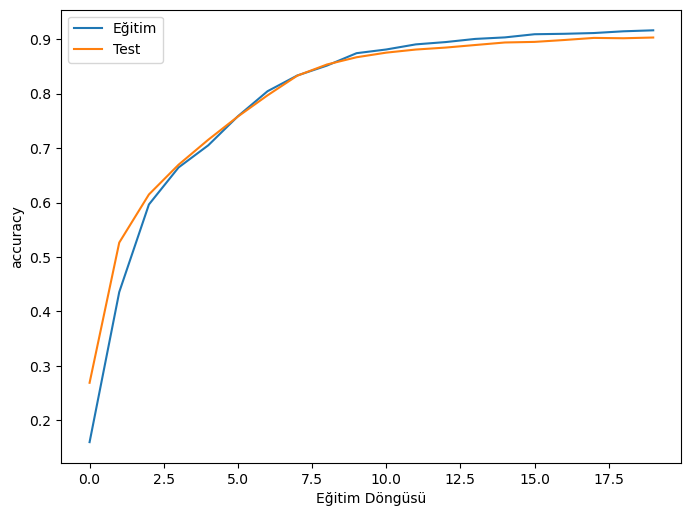

In [35]:
model3, gecmis3 = egitim(0.001, 0.9, "model_3")
dogrulama(model3)
grafik(gecmis3)

# Yorum

## Aynı mimari yapıda 3 model, farklı öğrenme oranlarıyla sınanmıştır.
## Model 0.1 öğrenme oranı ve 0.9 momentum değeri ile 20 epoch'ta eğitilememektedir. Yaklaşık %9 tutarlılığa ulaşabildiği görülmektedir. Fakat loss çok fazla büyüdüğü için bir süre sonra "nan" haline gelmektedir. Bu da ağırlıkların öğrenilememesine sebep olmaktadır. Dolayısıyla eğitilmemiş bir model gibi çok düşük tutarlılığa sahiptir. Öğrenme katsayısı ve momentum büyük olduğu için gradyanlar bu büyük oran ile çarpıldığından daha büyük adımlarla ilerlenmektedir. Bu da patlayan gradyanlara (exploding gradient) sebep olmaktadır.
## Model1'in düşük momentumlu çalışan bir alternatifi aşağıdaki hücrede sınanmıştır.
## 


## 0.001 öğrenme oranı ile 3. model 20 epoch'ta %90 tutarlılığa kadar eğitilebilmiştir. Daha küçük adımlarla optimum noktaya daha çok yaklaşılabilmiştir.
## 

## 2. model ise 0.01 öğrenme oranı ile, eğitim setinde %99; doğrulama setinde %95 olan en yüksek tutarlılıklara ulaşabilmiştir. Bu modelin 3. modelden daha iyi eğitilebilmiş olmasının sebebi öğrenme oranının ne çok düşük olması ne de çok yüksek olmasıdır. Hatanın minimum olduğu noktaya 0.01'lik gradyan adımlarıyla daha çok yaklaşabilmekteyiz. Yapılan deneylerde en küçük öğrenme oranına sahip modelde tutarlılığı yükseltebilmek için epoch sayısını artırmak gerekir. Veya Adam vb. bir uygun optimizasyon yöntemiyle daha yüksek tutarlılık oranları sınanabilir.
## 

## 3. model 0.001 öğrenme oranı ile eğitim setinde %91, doğrulama setinde %90 tutarlılığa sahiptir. Epoch sayısı artırılarak bu oranlar yükseltilebilir. Veya model önce yüksek öğrenme oranı (0.01) ile eğitilip daha sonra düşük öğrenme oranı (0.001) ile fine tunning işlemi yapılabilir.
## 

Model: "model_1_alternatif"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 64)        1664      
_________________________________________________________________
re_lu_11 (ReLU)              (None, 28, 28, 64)        0         
_________________________________________________________________
average_pooling2d_11 (Averag (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 128)       204928    
_________________________________________________________________
flatten_11 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_33 (Dense)             (None, 1280)       

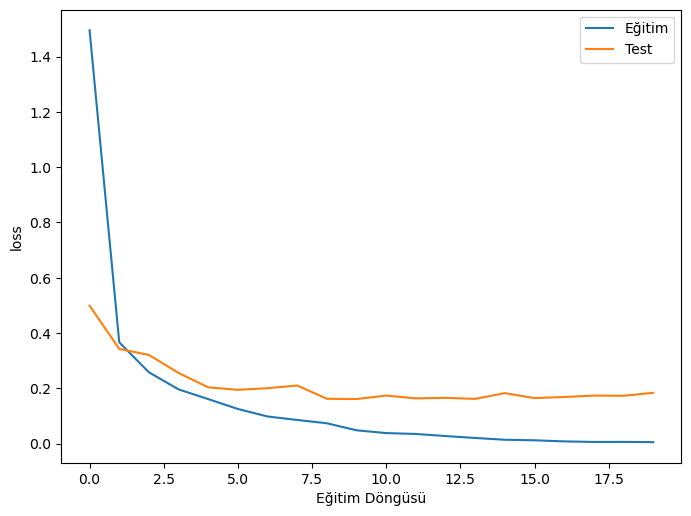

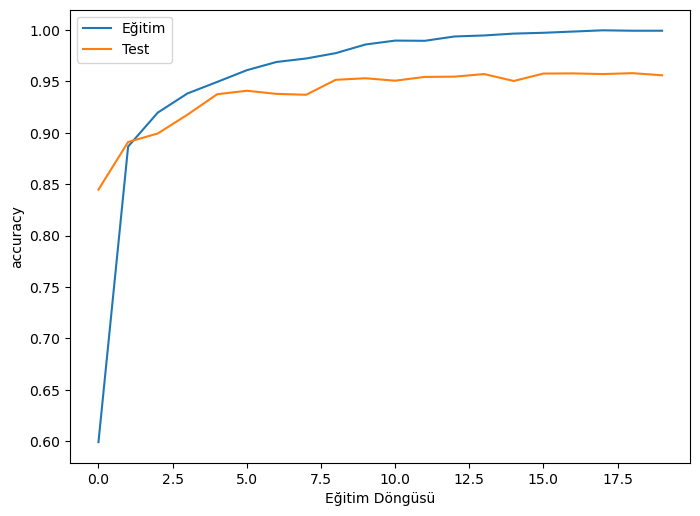

In [36]:
model1_alternatif, gecmis1_alternatif = egitim(0.1, 0.4, "model_1_alternatif")
dogrulama(model1_alternatif)
grafik(gecmis1_alternatif)